1. Clone NextFace and set the correct path on google drive
2. enable gpu from Menu->Runtime-> Change runtime type

In [1]:
# !git clone https://github.com/abdallahdib/NextFace.git
import sys
import os
sys.path.insert(0,'/content/NextFace') #verify ur path

2. install dependencies

In [2]:
# pip install face_alignment==1.2.0 redner-gpu

3. create optimizer and set the correct path to the **'baselMorphableModel'** directory 

PS: u have to manually upload the file **'morphableModel-2017.pickle'** from your local pc to google drive or download the **'model2017-1_face12_nomouth.h5'** from https://faces.dmi.unibas.ch/bfm/bfm2017.html and **albedoModel2020_face12_albedoPart.h5** from https://github.com/waps101/AlbedoMM/releases/download/v1.0/albedoModel2020_face12_albedoPart.h5. put these two files inside the **'baselMorphableModel'** directory

The reason for not adding these files directly because we are not allowed to share these files and u have to manually agree with their license term before using these data. so yeh! unfortunately u will have to manually download them (please refer to readme file in the github repository)

In [3]:
from optimizer import Optimizer
from config import Config
config = Config()
config.fillFromDicFile('./optimConfig.ini')
# config.device = 'cuda' # torch not compiled with cuda
config.path = './baselMorphableModel/' #verify ur path


loading optim config from:  ./optimConfig.ini


In [4]:
import torch

imagePath = './input/detailled_faces_unsplash/1.jpg' #verify ur path
outputDir = './output/' + os.path.basename(imagePath.strip('/'))
# VALIDATE CUDA
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
# # torch.cuda.set_device(torch.cuda.device(0) )
# # torch.backends.cudnn.benchmark = False
print(torch.cuda.device_count())
# torch.cuda.empty_cache()
torch.cuda.set_device(0)
    
optimizer = Optimizer(outputDir ,config)

True
NVIDIA GeForce RTX 4070 Laptop GPU
1
Loading Basel Face Model 2017 from ./baselMorphableModel//morphableModel-2017.pickle...
loading mesh normals...
loading uv parametrization...
loading landmarks association file...
creating sampler...


c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


now we can run the optimization

loading image from path:  ./input/detailled_faces_unsplash/1.jpg
detecting landmarks using: fan


c:\Users\AQ14980\Desktop\repos\NextFace\landmarksfan.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.tensor(landmarks, device = self.device)
init camera pose...
1/3 => Optimizing head pose and expressions using landmarks...
100%|██████████| 2000/2000 [00:06<00:00, 300.92it/s]
2/3 => Optimizing shape, statistical albedos, expression, head pose and scene light...
  0%|          | 0/401 [00:00<?, ?it/s]

torch.Size([1, 9, 3])
torch.Size([1, 28588, 9])
torch.Size([1, 28588, 1])
torch.Size([1, 28588, 1])
torch.Size([1, 28588, 1])
normals
torch.Size([1, 28588, 3])
torch.Size([1, 512, 512, 3])
28588
torch.Size([1, 512, 28588, 3])


  0%|          | 0/401 [00:01<?, ?it/s]


RuntimeError: Error building extension 'nvdiffrast_plugin_gl': [1/1] "C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.36.32532\bin\Hostx64\x64/link.exe" common.o glutil.o rasterize_gl.o torch_bindings_gl.o torch_rasterize_gl.o /nologo /DLL /LIBPATH:c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\nvdiffrast\torch\..\lib /DEFAULTLIB:gdi32 /DEFAULTLIB:opengl32 /DEFAULTLIB:user32 /DEFAULTLIB:setgpu c10.lib c10_cuda.lib torch_cpu.lib torch_cuda.lib -INCLUDE:?warp_size@cuda@at@@YAHXZ torch.lib /LIBPATH:c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\torch\lib torch_python.lib /LIBPATH:c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\Scripts\libs "/LIBPATH:C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\lib\x64" cudart.lib /out:nvdiffrast_plugin_gl.pyd
[31mFAILED: [0mnvdiffrast_plugin_gl.pyd 
"C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.36.32532\bin\Hostx64\x64/link.exe" common.o glutil.o rasterize_gl.o torch_bindings_gl.o torch_rasterize_gl.o /nologo /DLL /LIBPATH:c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\nvdiffrast\torch\..\lib /DEFAULTLIB:gdi32 /DEFAULTLIB:opengl32 /DEFAULTLIB:user32 /DEFAULTLIB:setgpu c10.lib c10_cuda.lib torch_cpu.lib torch_cuda.lib -INCLUDE:?warp_size@cuda@at@@YAHXZ torch.lib /LIBPATH:c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\torch\lib torch_python.lib /LIBPATH:c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\Scripts\libs "/LIBPATH:C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\lib\x64" cudart.lib /out:nvdiffrast_plugin_gl.pyd
LINK : fatal error LNK1104: cannot open file 'python39.lib'
ninja: build stopped: subcommand failed.


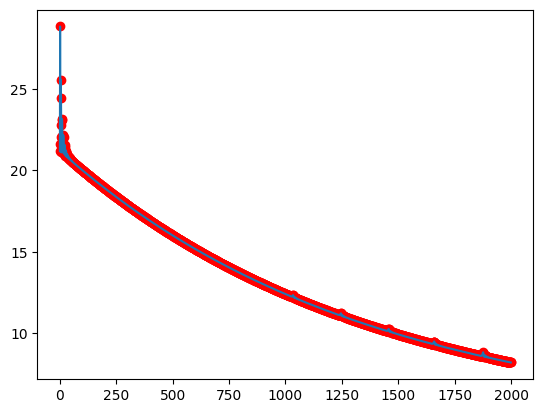

In [5]:
#run the optimization now 
optimizer.run(imagePath)
#display results
from IPython.display import Image, display
from IPython.display import Image
display(Image(outputDir + '/render_0.png'))
